# Sentiment Analysis with NLP 
## [sejal dhole]

Sentiment analysis, powered by Natural Language Processing (NLP), is the process of identifying and extracting the emotional tone or opinion expressed in text. It's a core NLP application used to determine whether a piece of text is positive, negative, or neutral, and can even delve into specific emotions.
 
This notebook performs **Sentiment Analysis** using the **IMDB Movie Review Dataset**.  
We use **TF-IDF Vectorization** and **Logistic Regression** to analyze whether the review is **positive or negative**.
    




##  Steps Covered

1. Importing libraries and dataset  
2. Data preprocessing  
3. TF-IDF Vectorization  
4. Train-test split  
5. Logistic Regression Model  
6. Evaluation (Accuracy, Confusion Matrix, Classification Report)  
7. Visualization (Word Clouds and Confusion Matrix)

In [1]:

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from wordcloud import WordCloud


In [2]:
import os

# List files inside the input folder
os.listdir("/kaggle/input")


['imdb-dataset-of-50k-movie-reviews']

In [3]:
os.listdir("/kaggle/input/imdb-dataset-of-50k-movie-reviews")


['IMDB Dataset.csv']

In [4]:

# Load Dataset
df = pd.read_csv("/kaggle/input/imdb-dataset-of-50k-movie-reviews/IMDB Dataset.csv")
df.head()


,review,sentiment
0,One of the other reviewers has mentioned that ...,positive
1,A wonderful little production. <br /><br />The...,positive
2,I thought this was a wonderful way to spend ti...,positive
3,Basically there's a family where a little boy ...,negative
4,"Petter Mattei's ""Love in the Time of Money"" is...",positive


In [5]:

# Convert labels to numerical
df['sentiment'] = df['sentiment'].map({'positive': 1, 'negative': 0})
df.head()


,review,sentiment
0,One of the other reviewers has mentioned that ...,1
1,A wonderful little production. <br /><br />The...,1
2,I thought this was a wonderful way to spend ti...,1
3,Basically there's a family where a little boy ...,0
4,"Petter Mattei's ""Love in the Time of Money"" is...",1


In [6]:

# TF-IDF Vectorization
vectorizer = TfidfVectorizer(stop_words='english', max_df=0.7)
X = vectorizer.fit_transform(df['review'])
y = df['sentiment']


In [7]:

# Split data into training and testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [8]:

# Train the model
model = LogisticRegression()
model.fit(X_train, y_train)


LogisticRegression()

In [9]:

# Predict and evaluate
y_pred = model.predict(X_test)

print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))

Accuracy: 0.8941

Classification Report:
               precision    recall  f1-score   support

           0       0.91      0.88      0.89      4961
           1       0.88      0.91      0.90      5039

    accuracy                           0.89     10000
   macro avg       0.89      0.89      0.89     10000
weighted avg       0.89      0.89      0.89     10000



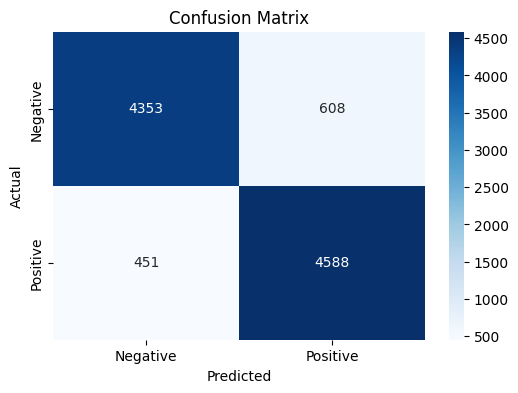

In [10]:

# Plot Confusion Matrix
conf_matrix = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(6,4))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues',
            xticklabels=['Negative', 'Positive'], yticklabels=['Negative', 'Positive'])
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()


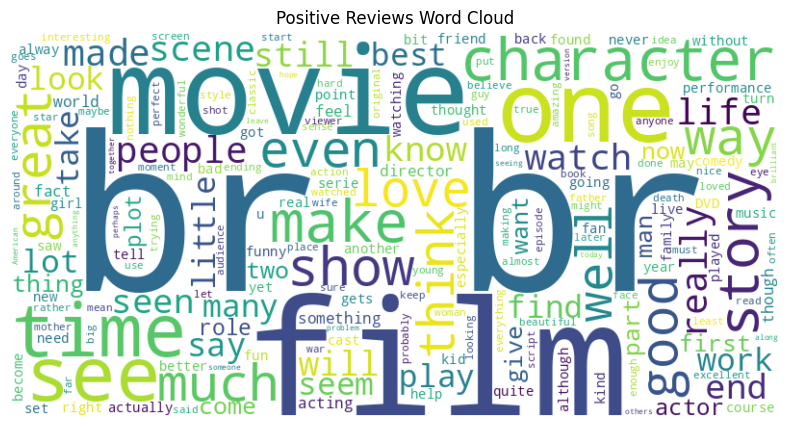

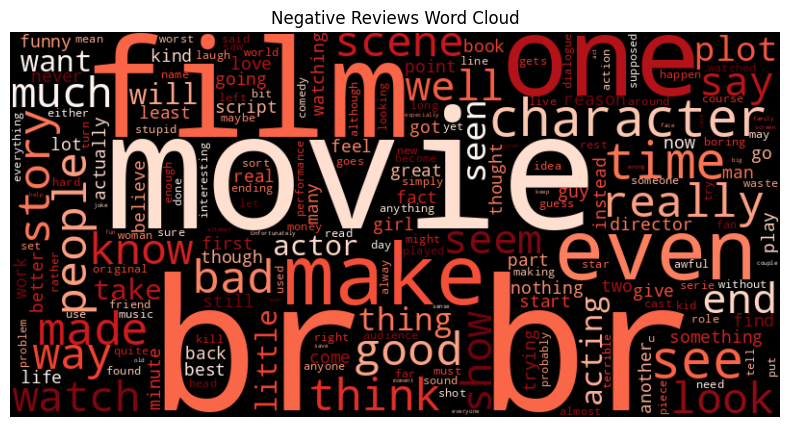

In [11]:

# Word Clouds
positive_reviews = ' '.join(df[df.sentiment == 1].review)
negative_reviews = ' '.join(df[df.sentiment == 0].review)

wordcloud_pos = WordCloud(width=800, height=400, background_color='white').generate(positive_reviews)
wordcloud_neg = WordCloud(width=800, height=400, background_color='black', colormap='Reds').generate(negative_reviews)

# Plot positive wordcloud
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud_pos, interpolation='bilinear')
plt.axis("off")
plt.title("Positive Reviews Word Cloud")
plt.show()

# Plot negative wordcloud
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud_neg, interpolation='bilinear')
plt.axis("off")
plt.title("Negative Reviews Word Cloud")
plt.show()

# Conclusion
This project demonstrates how Natural Language Processing (NLP) techniques can be effectively used to perform Sentiment Analysis on textual data. By applying TF-IDF vectorization and using a Logistic Regression model, we were able to classify movie reviews from the IMDB dataset as positive or negative with a good level of accuracy.

* The workflow included:
* Preprocessing raw text data
* Converting text to numerical vectors using TF-IDF
*  Building and training a logistic regression classifier
* Evaluating the model with accuracy and a confusion matrix
* Visualizing results for better interpretability

This project highlights the practical implementation of machine learning in understanding public opinion, which has wide applications in industries like marketing, customer service, and product analysis.